In [3]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import joblib
import os

In [4]:
df = pd.read_csv("../data/raw/dataset.csv")

In [5]:
print(df.columns.tolist())

['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']


In [6]:
# ✅ Create Target Column
df['dropout_flag'] = df['Class'].apply(lambda x: 1 if x == 'L' else 0)
df.drop('Class', axis=1, inplace=True)

In [7]:
# ❌ Drop unnecessary columns
cols_to_drop = ['NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Semester', 'Relation', 'ParentschoolSatisfaction']
df.drop(cols_to_drop, axis=1, inplace=True)

In [8]:
print(df.columns.tolist())

['gender', 'Topic', 'raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion', 'ParentAnsweringSurvey', 'StudentAbsenceDays', 'dropout_flag']


In [9]:
# 🔠 Convert categorical columns to category dtype
cat_cols = ['gender', 'Topic', 'ParentAnsweringSurvey', 'StudentAbsenceDays']
for col in cat_cols:
    df[col] = df[col].astype('category')

In [10]:
feature_cols = ['gender', 'Topic', 'ParentAnsweringSurvey', 'StudentAbsenceDays',
                'raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']

X = df[feature_cols]
y = df['dropout_flag']


In [11]:
# 🔀 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# ⚙️ Train the Model
xgb_model = XGBClassifier(enable_categorical=True, tree_method='hist', use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

c:\Users\Dell\anaconda3\envs\myenv\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:32:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [12]:
# 🔍 Predictions and Evaluation
y_pred = xgb_model.predict(X_test)

print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🔲 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


📋 Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.92      0.88      0.90        25

    accuracy                           0.95        96
   macro avg       0.94      0.93      0.93        96
weighted avg       0.95      0.95      0.95        96


🔲 Confusion Matrix:
 [[69  2]
 [ 3 22]]


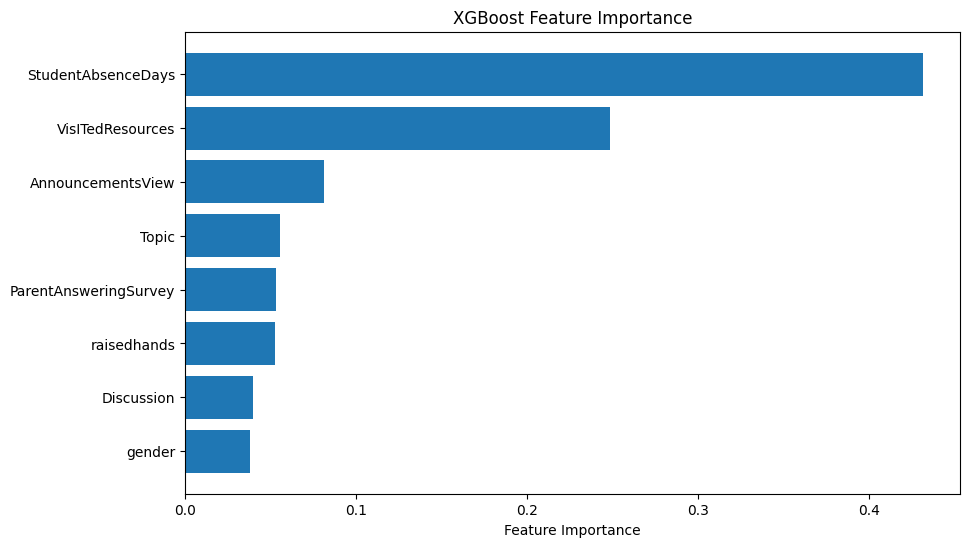

In [13]:
# 🔑 Feature Importance
plt.figure(figsize=(10, 6))
importances = xgb_model.feature_importances_
sorted_idx = importances.argsort()
plt.barh(X.columns[sorted_idx], importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance")
plt.show()

In [14]:
# 💾 Save the Model
os.makedirs("../model", exist_ok=True)
joblib.dump(xgb_model, "../model/xgboost_dropout_model.pkl")

print("✅ Model saved successfully in ../model/xgboost_dropout_model.pkl")

✅ Model saved successfully in ../model/xgboost_dropout_model.pkl
